<a href="https://www.kaggle.com/code/avinashreddykovvuri/a01-vitb-avinash-s-wids-mark-6?scriptVersionId=93762812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2022/train.csv
/kaggle/input/widsdatathon2022/test.csv
/kaggle/input/widsdatathon2022/sample_solution.csv


**In the above code importing some libraries like numpy, pandas and matplotlib to do mathematical , manipulating, visualisation on the current given data.**
**Actullay the data set is divided into train and test data which are need to train a model and test on it by using them. Those were imported and fitted into the variables train and test as follows:**

In [2]:
train = pd.read_csv('/kaggle/input/widsdatathon2022/train.csv')
test = pd.read_csv('/kaggle/input/widsdatathon2022/test.csv')

**Here the data is divided into test and train so futher plan of action in code should be done by considering both the test and trian data to get accurate result.**


**To generate final result that is to predict the site eui of given record ,we need to buit machine learning model.**

*    Exploratory data analysis.
*    Data Cleaning / Preprocessing.
*    Building Macine learning Model.



# **Exploratory data analysis**

* It is also known as EDA which mainly focus on analysing or exploring the data manually or in form of pictorial representation to know well about it before working on it.
* To do this we need to import some libraries for Data manipulation along with the Data visualization as done above.

In [3]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


**By using this operation we can actually look into the columns of the data and get and insight of it.**

In [4]:
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


**As same as done like above for the test data also to ensure that train and test are similar**

In [5]:
train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

**From this we came across the names of the columns that were present in the given train data which plays key role in training an efficient model.**

In [6]:
train.shape

(75757, 64)

In [7]:
test.shape

(9705, 63)

**Through the above code we can know the observations or record or row and features or columns of both test and train data .**

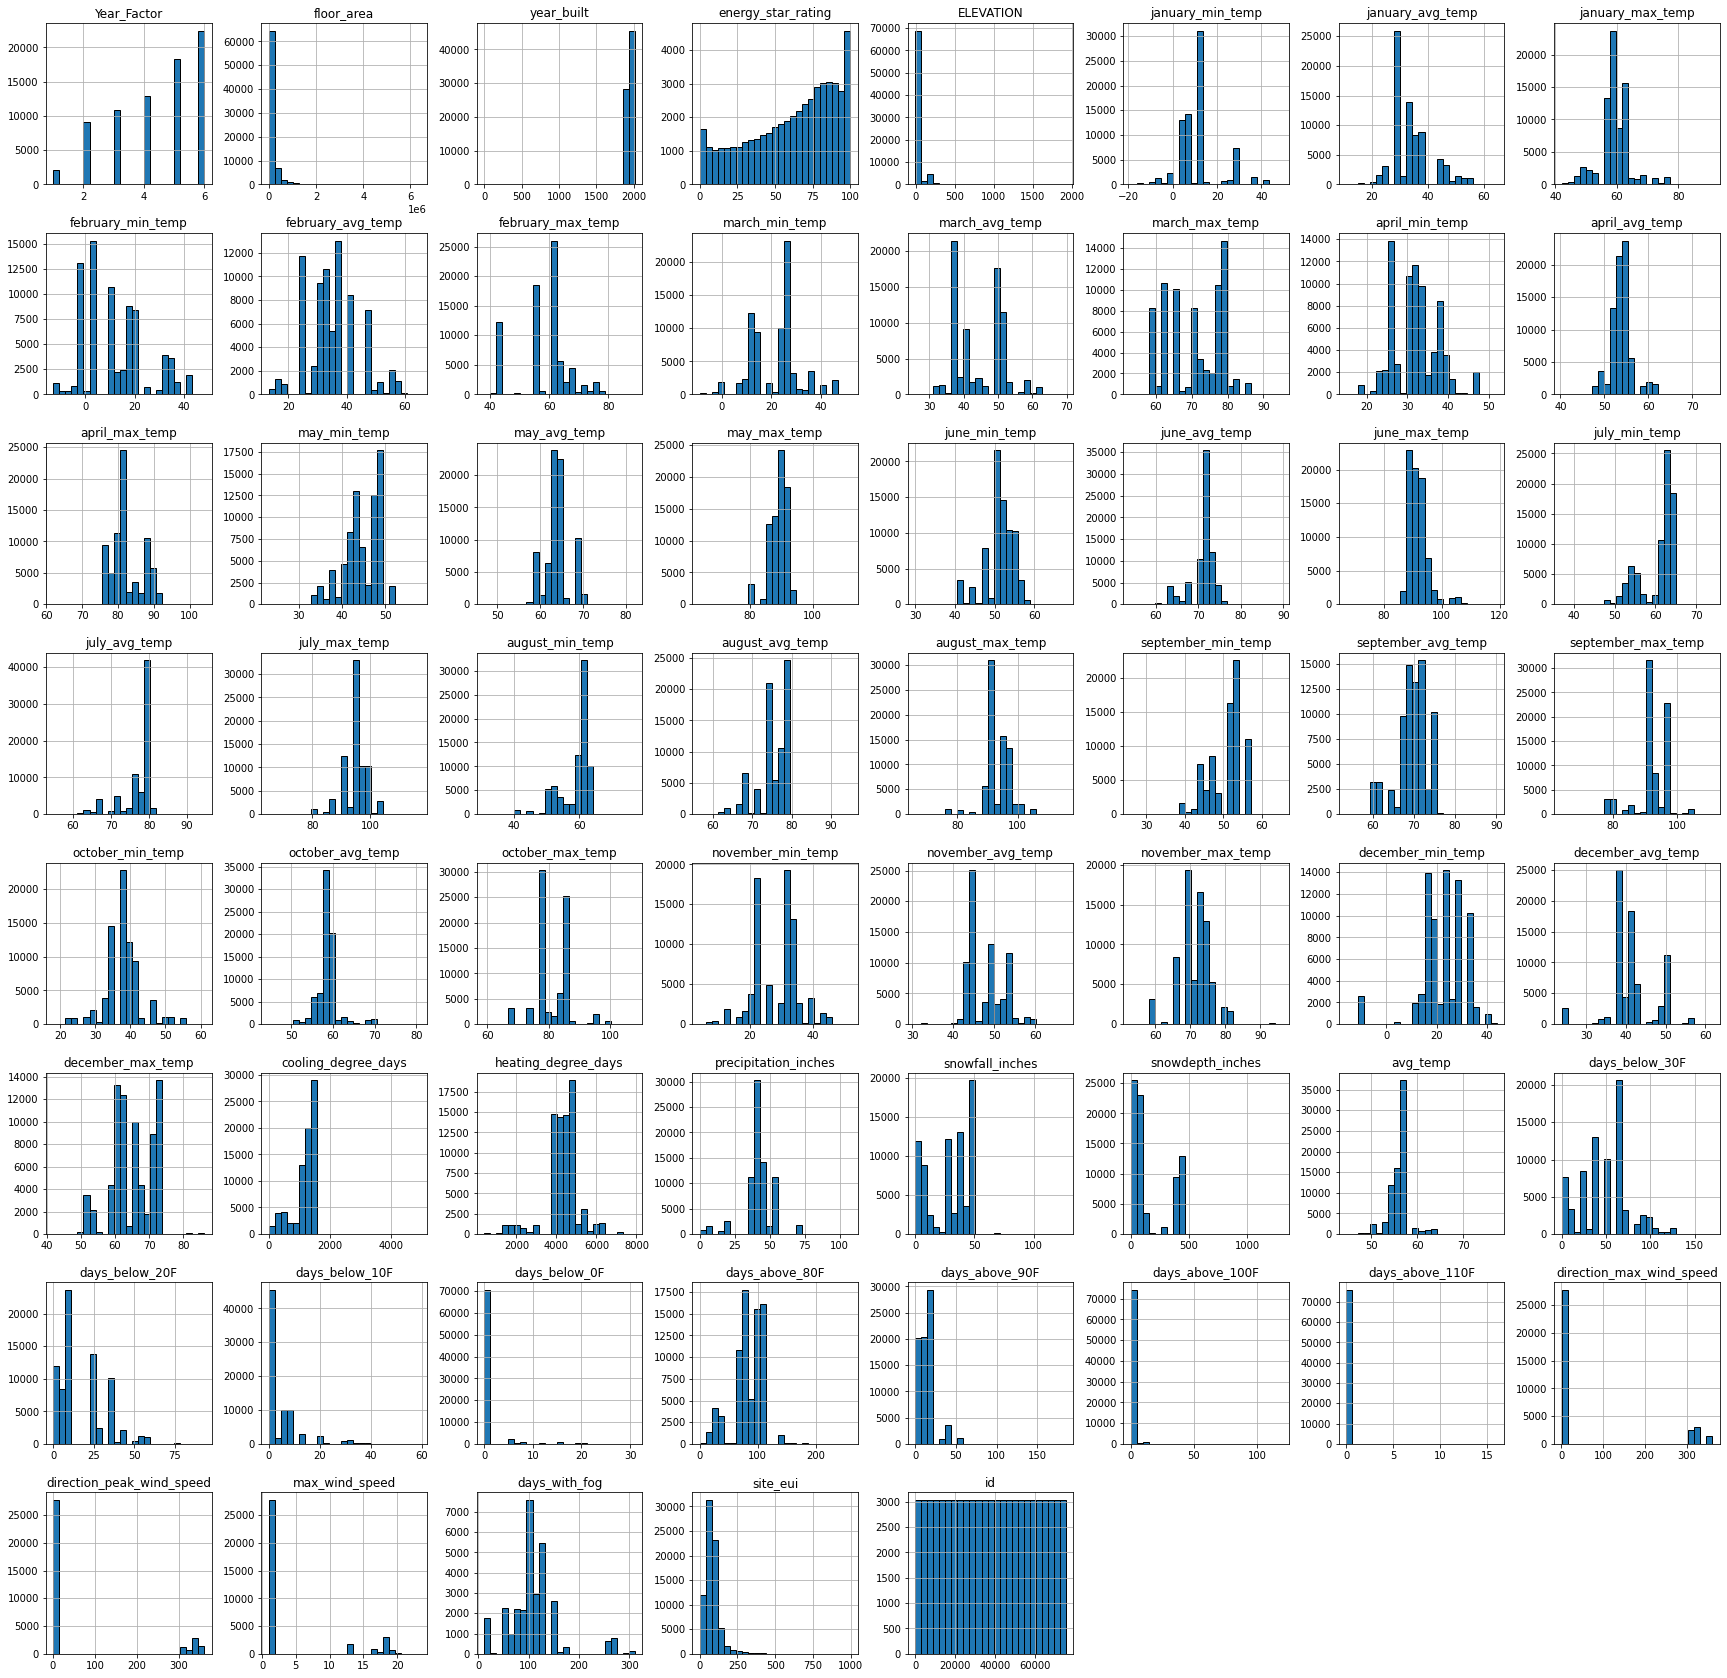

In [8]:
train.hist(edgecolor='black',bins = 25, figsize= (30,30))
plt.show()

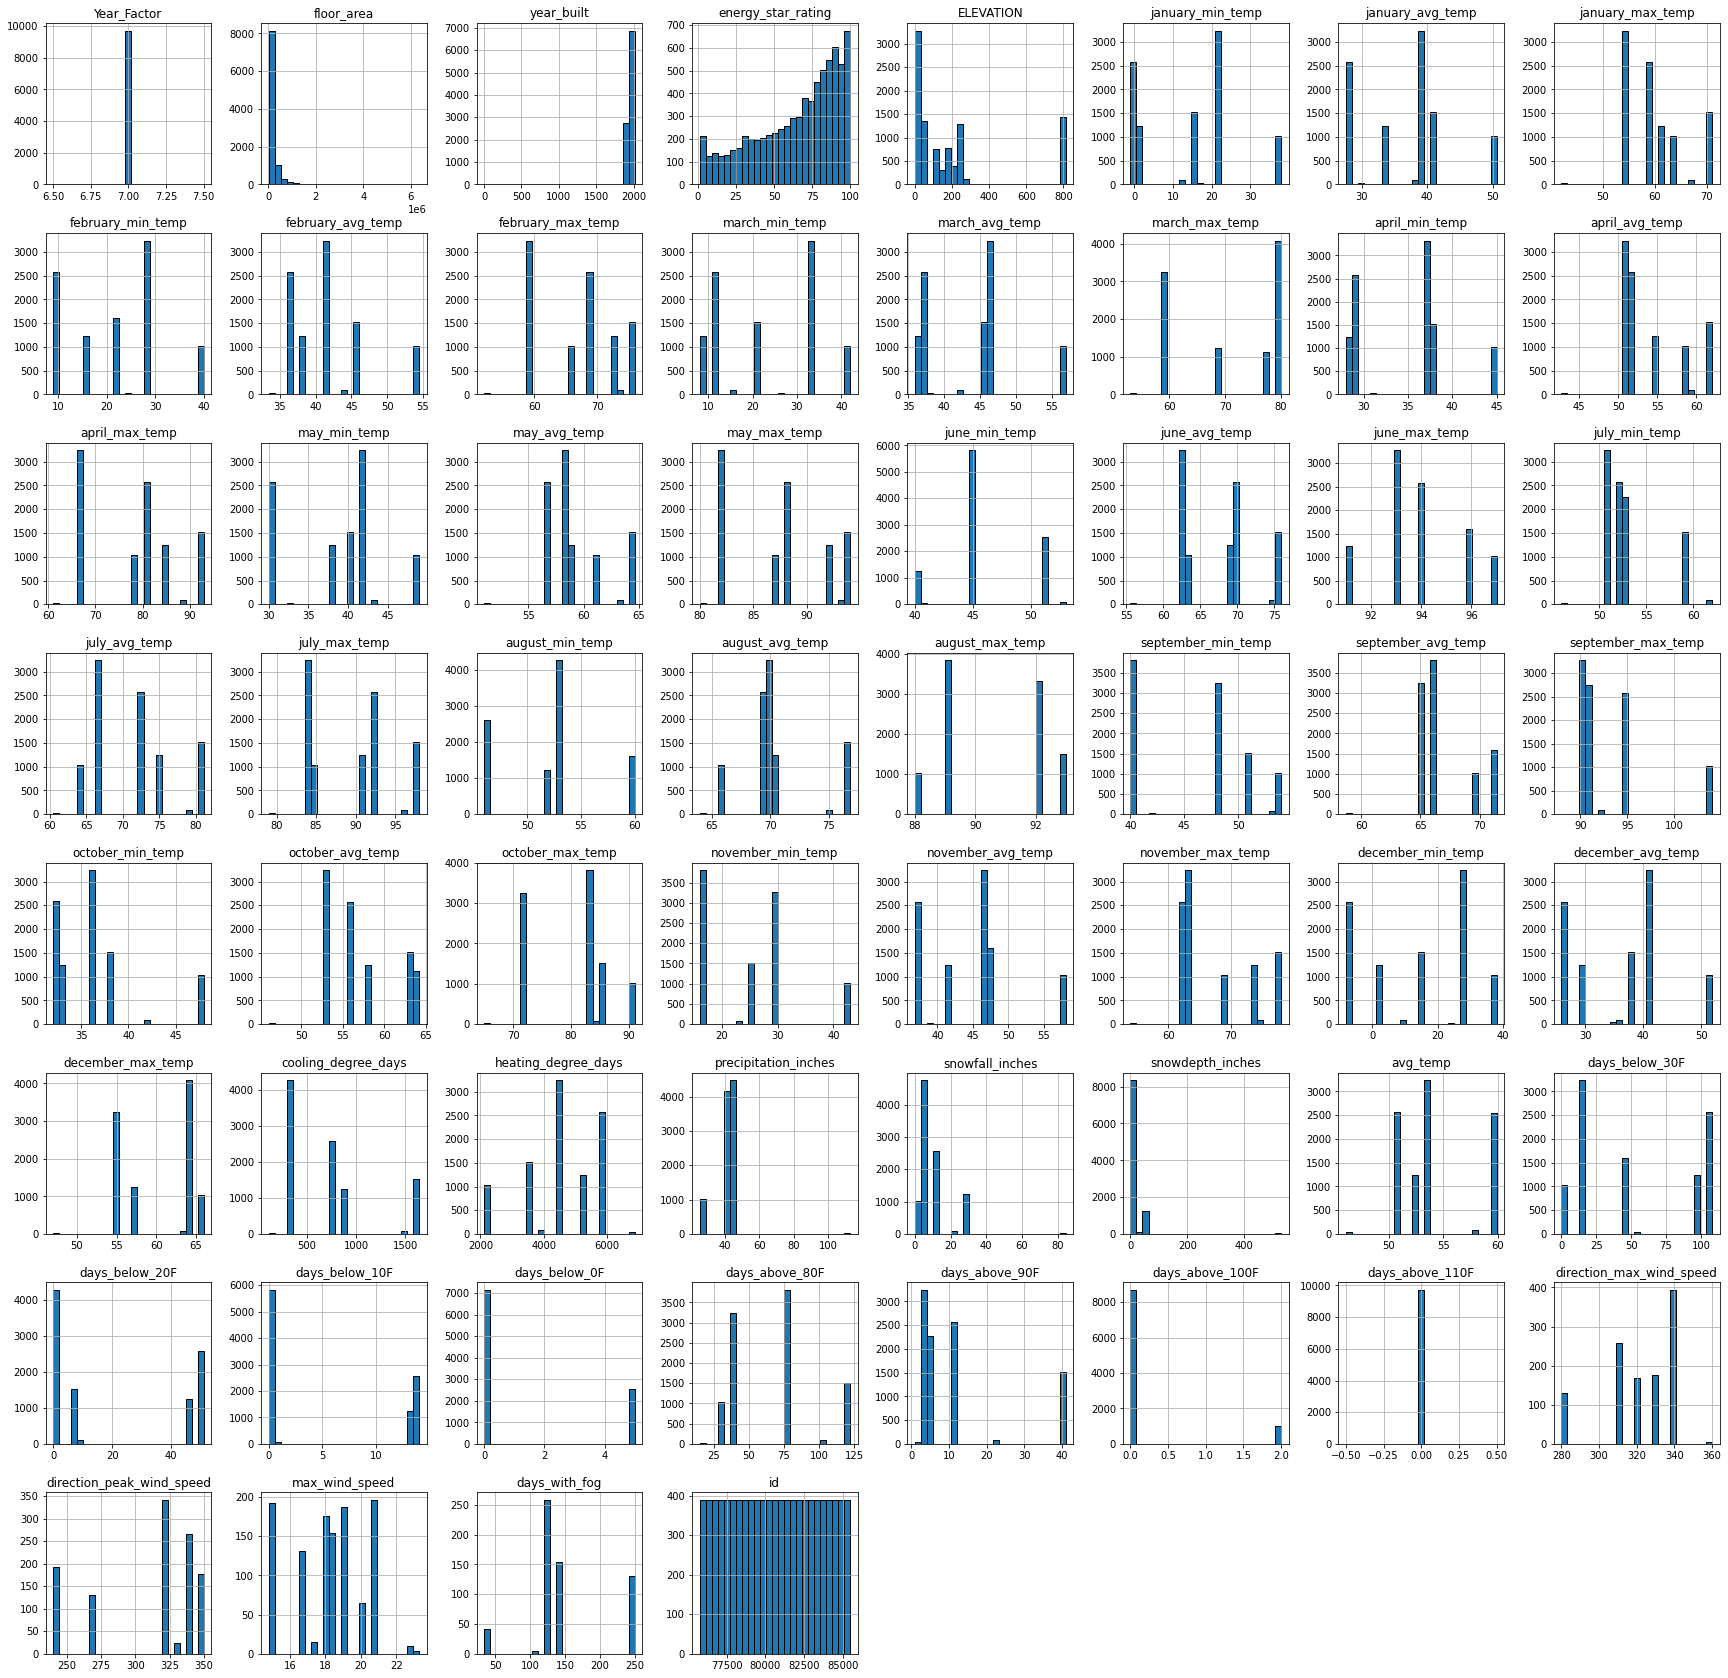

In [9]:
test.hist(edgecolor='black',bins = 25, figsize= (30,30))
plt.show()

# **Data Cleaning / Preprocessing**

**In this Data Cleaning / Preprocessing is used to**

* Handling Missing values
* Scaling and Normalization
* Parsing Dates
* Character Encoding
* Inconsistent Data Entry



**From these visual Data Analysis we came to know the data which is interrelated itself to the values which need to be predicted and among themselves. And about some columns which effect the end result a lot**

**Acutally dependency of one or more columns on the end data the need to be predicted known by using the visualisation techniques. so,it will be used futher to achive the task in Data cleaning**

In [10]:
def nul_values(col,data):
    null_val = dict()
    for i in col:
        if (data[i].isnull().sum())>0:
            null_val[i] = (data[i].isnull().sum())
    print(null_val)
print("Null values in train data",end=" : ")
nul_values(train.columns,train)
print("Null values in test data",end=" : ")
nul_values(test.columns,test)

Null values in train data : {'year_built': 1837, 'energy_star_rating': 26709, 'direction_max_wind_speed': 41082, 'direction_peak_wind_speed': 41811, 'max_wind_speed': 41082, 'days_with_fog': 45796}
Null values in test data : {'year_built': 92, 'energy_star_rating': 2254, 'direction_max_wind_speed': 8575, 'direction_peak_wind_speed': 8575, 'max_wind_speed': 8575, 'days_with_fog': 9117}


****From this we came across with that some columns with names as days_with_fog, max_wind_speed, direction_peak_wind_speed, direction_max_wind_speed has huge number of missing values in both test and train data.so it is better to delete that two columns in both train and test data.****

**And by looking into the Exploratory data analysis that the null values in coulmns direction_peak_wind_speed , days_with_fog  ,max_wind_speed were about half of the total data. so, we have to remove the rows/observations if null value present in one of the columns in that row. The below code is used to done it.**

In [11]:
nul_values(train.columns,train)
nul_values(test.columns,test)

{'year_built': 1837, 'energy_star_rating': 26709, 'direction_max_wind_speed': 41082, 'direction_peak_wind_speed': 41811, 'max_wind_speed': 41082, 'days_with_fog': 45796}
{'year_built': 92, 'energy_star_rating': 2254, 'direction_max_wind_speed': 8575, 'direction_peak_wind_speed': 8575, 'max_wind_speed': 8575, 'days_with_fog': 9117}


In [12]:
train.shape

(75757, 64)

In [13]:
train = train.drop(["direction_max_wind_speed", 'direction_peak_wind_speed', 'max_wind_speed'],axis=1)
test = test.drop(["direction_max_wind_speed", 'direction_peak_wind_speed', 'max_wind_speed'],axis=1)

In [14]:
b = pd.concat([train["year_built"],train["energy_star_rating"],train['days_with_fog']],axis=1)
a = pd.concat([test["year_built"],test["energy_star_rating"],test["days_with_fog"]],axis=1)
test = test.drop(["year_built","energy_star_rating",'days_with_fog'],axis=1)
train = train.drop(["year_built","energy_star_rating",'days_with_fog'],axis=1)
from sklearn.impute import SimpleImputer
# Imputation
my_imputer = SimpleImputer()
imputed_X_test = pd.DataFrame(my_imputer.fit_transform(a))
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(b))
# Imputation removed column names; put them back
imputed_X_test.columns = a.columns
imputed_X_train.columns = b.columns
train = pd.concat([train,imputed_X_train],axis=1)
test = pd.concat([test,imputed_X_test],axis=1)

In [15]:
nul_values(train.columns,train)
nul_values(test.columns,test)

{}
{}


In [16]:
train.shape

(75757, 61)

**From above code and comapring with acutal shape of train before cleaning we come up that 33% percent records were deleted which consists of null values.**

In [17]:
train.describe()

,Year_Factor,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id,year_built,energy_star_rating,days_with_fog
count,75757.000000,7.575700e+04,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,...,0.876764,82.709809,14.058701,0.279539,0.002442,82.584693,37878.000000,1952.306764,61.048605,109.142051
std,1.471441,2.468758e+05,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,...,2.894244,25.282913,10.943996,2.252323,0.142140,58.255403,21869.306509,36.601607,23.063738,31.883663
min,1.000000,9.430000e+02,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.001169,0.000000,0.000000,0.000000,12.000000
25%,3.000000,6.237900e+04,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,...,0.000000,72.000000,6.000000,0.000000,0.000000,54.528601,18939.000000,1927.000000,56.000000,109.142051
50%,5.000000,9.136700e+04,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,61.000000,25.000000,...,0.000000,84.000000,12.000000,0.000000,0.000000,75.293716,37878.000000,1952.306764,61.048605,109.142051
75%,6.000000,1.660000e+05,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,62.000000,27.000000,...,0.000000,97.000000,17.000000,0.000000,0.000000,97.277534,56817.000000,1976.000000,76.000000,109.142051
max,6.000000,6.385382e+06,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,89.000000,52.000000,...,31.000000,260.000000,185.000000,119.000000,16.000000,997.866120,75756.000000,2015.000000,100.000000,311.000000


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           75757 non-null  int64  
 1   State_Factor          75757 non-null  object 
 2   building_class        75757 non-null  object 
 3   facility_type         75757 non-null  object 
 4   floor_area            75757 non-null  float64
 5   ELEVATION             75757 non-null  float64
 6   january_min_temp      75757 non-null  int64  
 7   january_avg_temp      75757 non-null  float64
 8   january_max_temp      75757 non-null  int64  
 9   february_min_temp     75757 non-null  int64  
 10  february_avg_temp     75757 non-null  float64
 11  february_max_temp     75757 non-null  int64  
 12  march_min_temp        75757 non-null  int64  
 13  march_avg_temp        75757 non-null  float64
 14  march_max_temp        75757 non-null  int64  
 15  april_min_temp     

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year_Factor           9705 non-null   int64  
 1   State_Factor          9705 non-null   object 
 2   building_class        9705 non-null   object 
 3   facility_type         9705 non-null   object 
 4   floor_area            9705 non-null   float64
 5   ELEVATION             9705 non-null   float64
 6   january_min_temp      9705 non-null   int64  
 7   january_avg_temp      9705 non-null   float64
 8   january_max_temp      9705 non-null   int64  
 9   february_min_temp     9705 non-null   int64  
 10  february_avg_temp     9705 non-null   float64
 11  february_max_temp     9705 non-null   int64  
 12  march_min_temp        9705 non-null   int64  
 13  march_avg_temp        9705 non-null   float64
 14  march_max_temp        9705 non-null   int64  
 15  april_min_temp       

**By using the above code we can get the complete information of the statistical data and type of the value that columns has in the train.**

# **And finally the data was divided into as follows:**
* Categorical data
* Numerical data

**To train a model there is no problem with the Numerical data which is in the form of integers or real numbers but the main problem with the categorical data which is in words or in string form.**
**So the categorical data was identified through above code and then need to transform.**

In [20]:
def fndCatData(data):
    col_names = []
    for col in data.columns:
        if data[col].dtypes == "object":
            col_names.append(col)
    print(col_names)
fndCatData(train)
fndCatData(test)

['State_Factor', 'building_class', 'facility_type']
['State_Factor', 'building_class', 'facility_type']


In [21]:
print(train['State_Factor'].unique())
print(train['building_class'].unique())
print(train['facility_type'].unique())

['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
['Commercial' 'Residential']
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_Assembly_Recreation' 'Service_Uncategorized'
 'War

**From above code we found the categorical data columns of both  test and train data**

In [22]:
from sklearn.preprocessing import LabelEncoder
train["State_Factor"] = LabelEncoder().fit_transform(train["State_Factor"])
train["building_class"] = LabelEncoder().fit_transform(train["building_class"])
train["facility_type"] = LabelEncoder().fit_transform(train["facility_type"])
test["State_Factor"] = LabelEncoder().fit_transform(test["State_Factor"])
test["building_class"] = LabelEncoder().fit_transform(test["building_class"])
test["facility_type"] = LabelEncoder().fit_transform(test["facility_type"])

In [23]:
print(train['State_Factor'].unique())
print(train['building_class'].unique())
print(train['facility_type'].unique())
print(test['State_Factor'].unique())
print(test['building_class'].unique())
print(test['facility_type'].unique())

[0 3 4 5 6 1 2]
[0 1]
[13 55 48  6 56 58 32  4  2 25 30  5 18 19 35 51 50 21 49  8 14 34 40 47
 24 29 33  3 54 52 39 53 57 12 17 10 37 11  9 42 28 15  7  1 27 20 36 46
 44 31 38 45 16 22 26 43 41 23  0 59]
[0 3 4 5 2 1]
[0 1]
[13 40 25 47 30 55 54 58  2 48 37 49 50  6 32  9 56 18 57  8  4 29 21 12
 33 11 17 53  5 41 19 14  3 23 15 42 35 10 34 51 28 39  7 24 52 27 46 44
 36 31 38 20 22 26 16 45 43  0 59  1]


In [24]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id,year_built,energy_star_rating,days_with_fog
0,1,0,0,13,61242.0,2.4,36,50.5,68,35,...,0,14,0,0,0,248.682615,0,1942.0,11.0,109.142051
1,1,0,0,55,274000.0,1.8,36,50.5,68,35,...,0,14,0,0,0,26.500150,1,1955.0,45.0,12.000000
2,1,0,0,48,280025.0,1.8,36,50.5,68,35,...,0,14,0,0,0,24.693619,2,1951.0,97.0,12.000000
3,1,0,0,6,55325.0,1.8,36,50.5,68,35,...,0,14,0,0,0,48.406926,3,1980.0,46.0,12.000000
4,1,0,0,56,66000.0,2.4,36,50.5,68,35,...,0,14,0,0,0,3.899395,4,1985.0,100.0,109.142051


In [25]:
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,id,year_built,energy_star_rating,days_with_fog
0,7,0,0,13,28484.0,2.4,38,50.596774,64,40,...,0,0,29,5,2,0,75757,1994.0,37.0,150.755102
1,7,0,0,13,21906.0,45.7,38,50.596774,64,40,...,0,0,29,5,2,0,75758,1961.0,55.0,150.755102
2,7,0,0,13,16138.0,59.1,38,50.596774,64,40,...,0,0,29,5,2,0,75759,1950.0,1.0,150.755102
3,7,0,0,13,97422.0,35.4,38,50.596774,64,40,...,0,0,29,5,2,0,75760,1971.0,34.0,150.755102
4,7,0,0,13,61242.0,1.8,38,50.596774,64,40,...,0,0,29,5,2,0,75761,1942.0,35.0,126.000000


In [26]:
train = train.drop(["id"],axis=1)
test = test.drop(["id"],axis=1)

**Through the above code we came across the updated version of the new trian data after certian opertaions that was to train a model.**


# **Building ML model**

**Before Building model, we have to separate the data of columns with features and with values to be predicted as y and X as follows.**


In [27]:
X_train = train.drop(["site_eui"],axis=1)
X_test = test
y_train = train["site_eui"]

In [28]:
print(X_train.shape)
print(X_test.shape)

(75757, 59)
(9705, 59)


In [29]:

#from sklearn.ensemble import GradientBoostingRegressor

#my_model = GradientBoostingRegressor(n_estimators=26, learning_rate=0.08,max_depth=9,subsample=0.86,)
#my_model.fit(X_train, y_train)
#val_predictions = my_model.predict(X_test)

In [30]:
import lightgbm as ltb
model = ltb.LGBMRegressor(n_estimators=900, learning_rate=0.1,max_depth=450,subsample=0.5)
model.fit(X_train, y_train)
val_predictions = model.predict(X_test)

In [31]:
sub = pd.read_csv('/kaggle/input/widsdatathon2022/sample_solution.csv')
sub['site_eui'] = val_predictions
sub.to_csv('out5.csv',index=False)
sub.head()

,id,site_eui
0,75757,249.728113
1,75758,205.643197
2,75759,284.322370
3,75760,255.047177
4,75761,212.944081


**Actually we need id's of certain columns along with the predicted values . so they were concated to the same variable as mentioned as above.**